# Astronaut Activity 

## CompBio Camp- February 2019

### Authors: Lauren E. Blake and Daniel P. Rice

We are going to be analyzing real data from NASA astronauts and then with data created for a mission to Mars adventure!

NASA is very interested in the cardiovascular health of the astronauts. We are going to compare heart information of the astronauts on Earth (preflight) versus in space (in flight). 

## What does the data look like?

NASA provides the following data description:

~~~~
NASA’s Life Sciences Data Archive (http://lsda.jsc.nasa.gov)
Investigator Name: Farhi, Leon 
Mission (Payload): STS-40 and STS-58 
Experiment title (ID): Inflight Study of Cardiovascular Deconditioning (178066)

    Variable:           Description:
    Subject number      astronaut identifyer number
    HR                  heart rate in beats/minute
    SV                  stroke volume in mL
~~~~

1) Look at the data description. What are the units for heart rate?

2) What does the acronym "SV" stand for? What are the units of "SV"? What do you think this measurement means?

3) Making a hypothesis: what do you think happened to the astronauts' heart rate in space? Why? Discuss with your neighbor.

## Loading the data

The data is stored in the file `astronaut_measurements.csv`. Our first step is to read that file into the computer's memory so that we can do things with it. For that, we'll use the `loadtxt` function from `numpy`. Don't worry about the details of this function, just know that it reads a file and returns its contents as one or more `numpy` arrays. We'll store each series of measurements as an array.

In [2]:
import numpy as np
(subject_number, 
    HR_preflight, 
    HR_inflight, 
    SV_preflight, 
    SV_inflight) = np.loadtxt('astronaut_measurements.csv', skiprows=1, unpack=True, delimiter=',')

The first "measurement" is each astronaut's subject number. NASA doesn't report their names for privacy reasons. This is (thankfully) typical for data on human subjects.

In [ ]:
print(subject_number)

The other measurements are heart rate (HR) and stroke volume (SV), each measured preflight and inflight. Print the preflight stroke volumes:

How did you find the right array to print?

## What is the impact of spaceflight on heart rate?

1) Find the preflight HR for astronaut 3 and astronaut 5. Which is greater? (Remember what number indices start at in python!)

2) For astronaut 1, find the difference between the preflight and inflight heart rate. 

3) Repeat for astronauts 2-6. 

4) Find the average difference between preflight and inflight heart rate.

In [ ]:
# Run this cell for a hint
import codecs
cipher_text = 'Erzrzore gur fhz shapgvba'
hint = codecs.decode(cipher_text, 'rot_13')
print(hint)

5) Now let's take a closer look at the data. We'll use the `scatter` function from matplotlib to make a scatterplot of the data. It works like this:

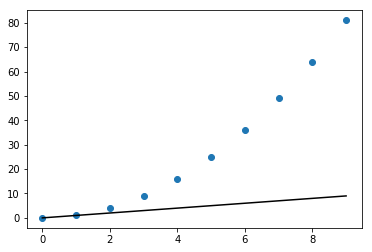

In [7]:
import matplotlib.pyplot as plt

# Make an array of the numbers from zero to nine
x = np.arange(0,10)
# Calculate y = x^2
y = x**2

# Make a scatterplot of x^2 vs x:
plt.scatter(x, y)
# Compare y = x^2 with the line y = x
plt.plot(x, x, color='black')
plt.show()

How is `scatter` different from `plot`?

__Plot HR in space (on the y-axis) versus HR preflight (on the x-axis).__ 

In [ ]:
# your code here


For comparison, add a straight line to the plot that shows what the data would look like if the two heart rates were the same.

In [ ]:
# your code here


6) Using your answers for questions 2-4 and the plots, what is the impact of spaceflight on heart rate?

7) For many of these questions, you could have calculated the answers by hand or with a caculator rather than written code to get the answers. Why is writing code to calculate these better? (Hints: What would have happened if there were 100 or 1000 astronauts rather than 6? What about the chance that you can catch an error when you use handcalculations versus progamming? What if you wanted to share your work with others?) 

## What is the cardiac output in space?

1) Cardiac output (Q) is the product of HR and SV. SV must be in liters, so the unit of cardiac output is L/min. Calculate Q for each astronaut when they are in space. 

2) The normal cardiac output range is about 4 to 8 L/min. Are all the astronauts within this range?

**Challenge question:** The code you wrote above is perfectly fine if you only need to calculate cardiac output once. But what if you need to calculate it again for different heart rates and stroke volumes? For code that you want to use more than once, it's usually a good idea to define a *function*.

Here's an example of how to define a new function. This function takes two number `a` and `b` and calculates their product `c = a * b`. We say that `a` and `b` are the _arguments_ of the function and that `c` is the _return value_.

In [ ]:
def product(a, b):
    c = a*b
    return c

In [ ]:
# Our function can take numbers as arguments
print(product(5, 3.7))

# It can also take variables that contain numbers.
# Note that the variable names don't have to match the arguments in the function definition
x = 10
y = 3
print(product(x, y))

Now, write your own function that takes heart rate and stroke volume as arguments and returns the cardiac output.

In [ ]:
# Complete this function definition
def cardiac_output(): # Add arguments
    # Calculations go here
    return # Return value goes here

Use your function to calculate the preflight and inflight cardiac output. Does the inflight rate output match what you calculated before?

In [ ]:
Q_preflight = cardiac_output(HR_preflight, SV_preflight)
# Your code here


## Challenge: Mission to Mars

The year is 2050, and we have received data for the first human voyage to Mars. We want to check the cardiovascular function of the humans headed to Mars. 

In [18]:
(subject_number_mars, 
    HR_mars, 
    SV_mars) = np.loadtxt('mars_measurements.csv', unpack=True, delimiter=',')

1) Find the number of humans in the dataset. 

In [14]:
# Run this cell for a hint
import codecs
cipher_text = 'Hfr gur yra shapgvba'
hint = codecs.decode(cipher_text, 'rot_13')
print(hint)

Use the len function


'Hfr gur yra shapgvba'

2) The normal cardiac output range is about 4 to 8 L/min. We want to make sure that the voyager's hearts are pumping properly, and get an alert for the individuals that are out of range. Therefore, calculate cardiac output (Q) for each human. Print the subject number(s) of the individuals that are out of range (4-8 L/min). Which subjects are out of range?

Hint: Use a `for` loop and conditional statements.

3) Make a scatterplot cardiac output versus stroke volume. 

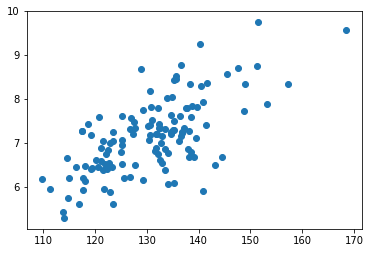

In [21]:
Q_mars = HR_mars*SV_mars/1000
plt.scatter(SV_mars, Q_mars)
plt.show()

4) By looking at the plot, what happens to cardiac output as stroke volume increases?

5) We will now fit a "best fit" line through the points on the plot (Q versus SV). To calculate the line, we will use the `linregress` function. Recall that a line is defined by its slope and y-intercept (where it meets the y-axis). Calculate and report the slope and the y-intercept. 

In [24]:
from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(SV_mars, Q_mars)

__Challenge:__ Remake the scatterplot, but this time also plot the best-fit line that we've just calculated.

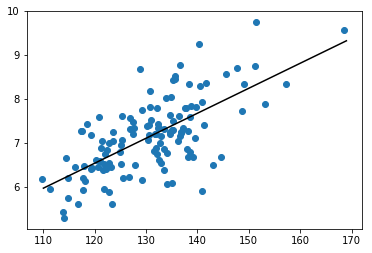

In [26]:
Q_mars = HR_mars*SV_mars/1000
plt.scatter(SV_mars, Q_mars)
x = np.arange(110, 170)
plt.plot(x, x*slope + intercept, '-k')
plt.show()

6) Based on the sign of the slope, what happens to cardiac output as stroke volume increases? Does this match with your answer in question 4 above?